In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df = pd.read_csv('50_Startups.csv')

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [9]:
df = df.join(pd.get_dummies(df['State']))

In [11]:
df.drop('State', axis=1, inplace=True)

In [13]:
X = df.drop('Profit', axis=1)

In [15]:
y= df['Profit']

In [17]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
reg = LinearRegression()

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [22]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
pred = reg.predict(X_test)

In [25]:
from sklearn.metrics import r2_score

In [26]:
r2_score(y_test, pred)

0.9241937845112718

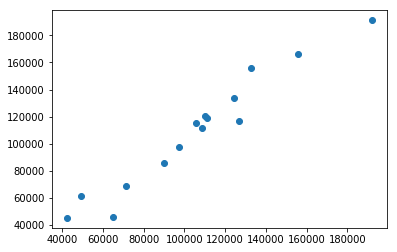

In [28]:
plt.scatter(y_test, pred)

c:\users\hp\appdata\local\programs\python\python36-32\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


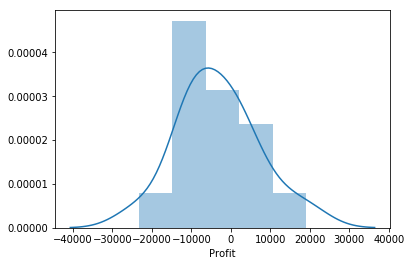

In [31]:
sns.distplot((y_test-pred));

In [32]:
coeff_df = pd.DataFrame(reg.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
R&D Spend,0.801206
Administration,0.019630
Marketing Spend,0.035198
California,-1849.679848
Florida,3478.313680
New York,-1628.633831


In [33]:
y_test

37     89949.14
14    132602.65
21    111313.02
32     97427.84
22    110352.25
1     191792.06
26    105733.54
46     49490.75
42     71498.49
47     42559.73
16    126992.93
24    108552.04
7     155752.60
45     64926.08
18    124266.90
Name: Profit, dtype: float64

In [34]:
pred

array([ 85610.28281231, 155888.39676566, 118955.25250477,  97321.71949351,
       120058.71468295, 191229.46901734, 115589.05335195,  61472.62238212,
        68398.2385283 ,  45017.90092835, 116555.37958016, 111205.4659845 ,
       166339.57762324,  45886.05016273, 133819.21111255])